## **EE4211               Question 2**


## Question 2.1
> #### In this part, you will build a model to forecast the hourly carpark availability in the future (aggregated across all carparks instead of looking at each carpark individually). Can you explain why you may want to forecast the carpark availability in the future? Who would find this information valuable? What can you do if you have a good forecasting model?


#### **1.   Forecasting carpark availability can be beneficial in real-life scenarios. It can help people arrange their trip and reflect traffic conditions because if the car is not sitting in a parking lot, there is a good chance it is running on the roads. Therefore, by observing the ratio of available parking spaces, the current congestion situations for roads can be inferred(except night), which can facilitate people to make better travel arrangements. Moreover, the ratio of available parking spaces is the most intuitive indicator for private car owners to decide whether to drive their private car out.**
#### **2.   Parking availability will be useful to The Land Transport Authority(LTA) and Housing & Development Board (HDB) since they can use that information to make better city planning and development decisions. In addition, with the concept of smart cities being proposed, that information can be used to build a city brain platform to provide data-driven, online and intelligent management of urban governance.**
#### **3.   A good forecasting model can be applied to control traffic wisely. For example, when carpark availability is low(except night), we can loosely conclude that the city's roads may be relatively congested. To keep traffic from jamming, LTA could control waiting time for traffic lights to ease traffic load. For people who would like to hang out, the predicted results of this model can be quantified to an indicator to roughly indicate how much more time it takes to travel than normal.**









## Question 2.2
> #### Build a linear regression model to forecast the hourly carpark availability for a given month. Use the month of July 2022 as a training dataset and the month of August 2022 as the test dataset. For this part, do not use additional datasets. The target is the hourly carpark availability percentage and you will have to decide what features you want to use. Generate two plots: (i) Time series plot of the actual and predicted hourly values (ii) Scatter plot of actual vs predicted hourly values (along with a line showing how good the fit is).

#### **We use three features:**


1.   **What is the day of the year? (i.e., July 1st is the 243th day of the year);**
2.   **What is the hour of that day? (i.e., 0, 1, ..., 23);**

3.   **Is that day a workday or (weekend or public holiday)?**


---



 **According to the result in Q1, the carpark availability has much difference depending on whether it is a workday or not, so we add feature 3, hoping to predict more accurate results**

In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202207-train.csv')
test = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202208-test.csv')

In [ ]:
x_train, y_train = train.drop('rate',axis=1), train['rate']
x_test, y_test = test.drop('rate',axis=1), test['rate']

In [ ]:
model = LinearRegression()
model.fit(x_train,y_train)

#get the R^2 socre for the linear regreessor
model.score(x_test,y_test)

0.24719166204610932

Text(0, 0.5, 'Predicted')

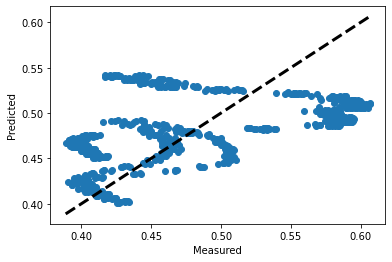

In [ ]:
y_pred = model.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

ax.set_xlabel('Measured') 
ax.set_ylabel('Predicted')

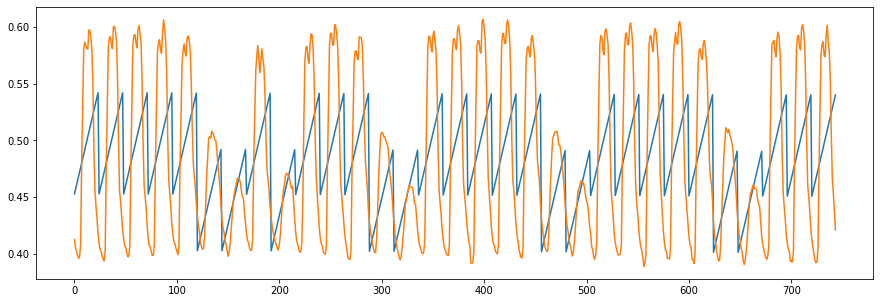

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(744),y_pred)
plt.plot(range(744),y_test)

## Question 2.3
> #### Do the same as Question 2.2 above but use support vector regressor (SVR)

In [ ]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
%matplotlib inline 

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202207-train.csv')
test = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202208-test.csv')

In [ ]:
#get train and test data ready
x_train, y_train = train.drop('rate',axis=1), train[['rate']]
x_test, y_test = test.drop('rate',axis=1), test[['rate']]

In [ ]:
#Do data processing, making model be better. 

rbX = RobustScaler()
x_train = rbX.fit_transform(x_train)
rbY = RobustScaler()
y_train = rbY.fit_transform(y_train)

In [ ]:
x_test = rbX.fit_transform(x_test)
y_test = rbY.fit_transform(y_test)

In [ ]:
# tunning for kernel function

svc_linear = SVR(kernel = 'linear')         #method1: SVR linear
svc_poly   = SVR(kernel = 'poly',degree = 2)#method2: SVR polynominal
svc_rbf    = SVR(kernel = 'rbf')            #method3: Gaussian 
#svc_sigmoid = SVR(kernel = 'sigmoid')        # Not suiable for this problem
#svc_precomputed = SVR(kernel = 'precomputed')# Not suiable for this problem

for reg in [svc_linear, svc_poly, svc_rbf]:
  reg.fit(x_train,y_train)
  print(reg.score(x_test,y_test))

0.2108110522534251
0.4114113887852845
0.9098584796489411


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##### By observing the performance of the above kernel functions, the performance of rbf kernel function is remarkably good. Now, choose RBF as kernel function and tune the Regularization parameter C

In [ ]:
# Regulization parameter tuning
# Adjusting C to see the improvemetents.

performance =[]
for i in range(100,10000, 100):
  svm = SVR(C = i)
  svm.fit(x_train,y_train)
  performance.append(svm.score(x_test,y_test))

In [ ]:
# Print(performance)
range_C = np.arange(100,26000, 100)
performance = np.array(performance)
print("When C =  {}:".format(range_C[performance.argmax()]))
print("SVR has the best performance {}".format(performance[performance.argmax()]))

When C =  7900:
SVR has the best performance 0.9200852655357087


In [ ]:
# See how gamma will influnce the model's performance 
svm = SVR(C = 7900,gamma = 'auto')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9036495131740734

##### **By adjusting the kernel functions, regulization paramenters, and gamma, it is safe to conclude the moudle has the best performance when using RBF kernel with C = 7900 and gamma = scale**

In [ ]:
svm = SVR(C = 7900,gamma = 'scale')
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9200852655357087

In [ ]:
y_pred = svm.predict(x_test)

Text(0, 0.5, 'Predicted')

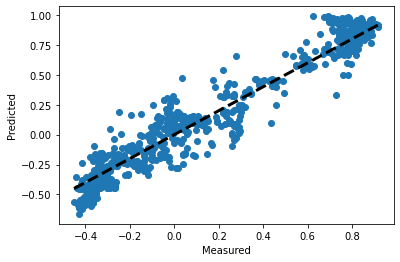

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)


ax.set_xlabel('Measured') 
ax.set_ylabel('Predicted')

In [ ]:
y_pred = pd.DataFrame(y_pred)
y_pred = rbY.inverse_transform(y_pred)

y_pred_a = []
for i in y_pred:
    y_pred_a.append(float(i))

y_test = pd.DataFrame(y_test)
y_test = rbY.inverse_transform(y_test)

y_test_a = []
for i in y_test:
    y_test_a.append(float(i))

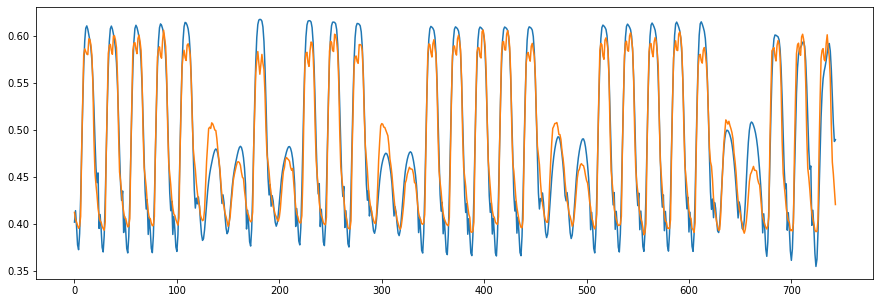

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(744),y_pred_a)
plt.plot(range(744),y_test_a)

## Question 2.4
> #### Do the same as Question 2.2 above but use decision tree (DT) regressor.

In [ ]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202207-train.csv')
test = pd.read_csv('/content/drive/MyDrive/EE4211_Project/Question2/202208-test.csv')

In [ ]:
x_train, y_train = train.drop('rate',axis=1), train['rate']
x_test, y_test = test.drop('rate',axis=1), test['rate']

In [ ]:
# Test how depth can effect the results

dtr_performance = []

for i in range(3,30,1):
  model = DecisionTreeRegressor(max_depth = i)
  model.fit(x_train,y_train)
  dtr_performance.append(model.score(x_test, y_test))



In [ ]:
print(dtr_performance)
range_max_depth = np.arange(3,30, 1)
dtr_performance = np.array(dtr_performance)
print("When max_Depth =  {}:".format(range_max_depth[dtr_performance.argmax()]))
print("DTR has the best performance {}".format(dtr_performance[dtr_performance.argmax()]))

[0.9377574560989047, 0.9668663633669807, 0.9705080184947761, 0.9706597432159544, 0.9630411525274861, 0.9613832914338077, 0.9591440773900837, 0.957373930683849, 0.9572860305358017, 0.957312272450608, 0.9572104957519254, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176, 0.9572367153006176]
When max_Depth =  6:
DTR has the best performance 0.9706597432159544


In [ ]:
# Get the R^2 score
model = DecisionTreeRegressor(max_depth = 6)
model.fit(x_train,y_train)
model.score(x_test, y_test)

0.9706597432159544

In [ ]:
y_pred = model.predict(x_test)

Text(0, 0.5, 'Predicted')

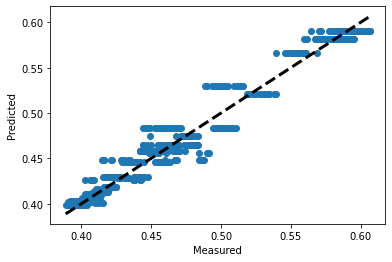

In [ ]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)

ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)

ax.set_xlabel('Measured') 
ax.set_ylabel('Predicted')

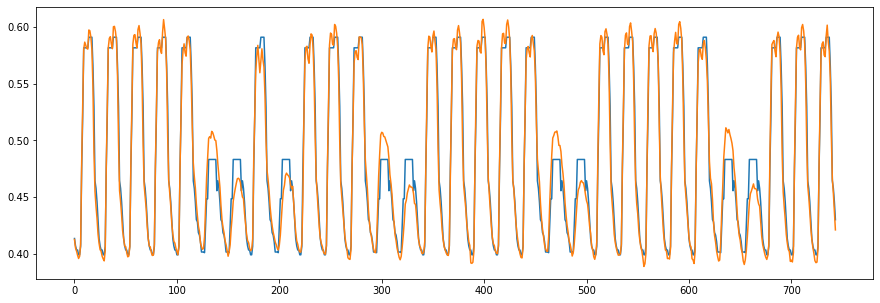

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(range(744),y_pred)
plt.plot(range(744),y_test)

## Question 2.5
> #### Make a final recommendation for the best regression model (out of the 3 methods above) by choosing a suitable performance metric. To ensure a fair comparison, carry out hyper- parameter tuning for all 3 methods. Then, make a final recommendation selecting only one model. Include both quantitative and qualitative arguments for your choice.


##### **To the best of our knowledge, the Decision Tree Regressor has the best performance among those three regressors.** <br/>



1.   **Observing the time versus occupancy rate plot from the raw data shows that the distribution is non-linear. Thus, using a linear regressor to fit the module is nonsense. As we expected, the linear regressor has the worst performance. The R^2 is only 0.24719. Since the problem is not linear, we should ignore hyperparameter tuning to try to use a linear model to fit a non-linear function.**  <br/>
2.   **For the support vector regressor, after some hyperparameter tuning, the R^2 can achieve 0.92008. We adjusted the following hyperparameters. First, we used the RobustScaler to pre-process the data. RobustScalar, as its name suggests, is very robust to outliers, thus, is highly appreciated in this problem. Secondly, we test the performance on different kernels. Again, the linear kernel is unsuitable for this problem since the problem is non-linear. We focused on the poly and Gaussian kernel functions. Back to the working principle of SVR, it works similarly to SVM in finding a hyperplane that has the min distance to data. We found the performance of the poly kernel is worse than the Gaussian kernel, probably because the feature can be a better fit in a higher dimension by using Gaussian kernel projection. We further ran a series of tests to adjust C, the regularization parameter. We found that when C equals 7900, the model has the best performance that the R^2 can achieve 0.92008.**<br/>
3.   **The Decision tree regressor has the best performance. The R^2 is 0.9707. The only hyperparameter we tuned is the "max_depth" parameter. After our testing, we found that the model has the best performance when the "max_depth" equals 6. This is because the tree will expand by default until all leaves are pure or all leaves contain less than min_samples_split samples. However, this led to the overfitting of the model because the leaf nodes are too pure that forcing the model lost its ability to generalize unseen data. In this regard, we adjust the max_depth to 6 to prevent the model from overfitting, thus making the mdoel has the best performance among those three regressors. Moreover, since the decision tree regressor can make decisions on the unstandardized data and thus does not need inverse predicted data back to the original scale, it is easier to use than SVR. Since the test and training data have an extremely similar distribution, DTR makes predictions on familiar data. Thus, DTR has a better performance than SVR.** 

# Appendix 
> ## Helper function for pulling down data to local and processing

#### **For data pre-processing**

In [ ]:
import pandas as pd
Data = pd.read_excel('CarSlots202207.xlsx', sheet_name = None)
sheet_names = list(Data.keys())

In [ ]:
# check wether data for every query hour are pulled from api for every hour
a = [[0 for i in range(24)] for j in range(32)]
for i in range(len(sheet_names)):
    a[int(sheet_names[i][6:8])][int(sheet_names[i][9:11])] = 1
for i in range(1, 32):
    for j in range(24):
        if a[i][j] == 0:
            print(i, j)
print(len(sheet_names))

In [ ]:
def get_data(sheet_name):
    data = Data[sheet_name]
    data = data[data.Type=='C'] # get the data that type == c
    data.loc[:, 'Rate'] = data['Available'] / data['Total']
    data = data[['Name','Rate']]
    data.dropna(inplace=True)
    data.loc[data.Rate > 1, 'Rate'] = 1
    data = data.rename(columns={'Rate': sheet_name})
    return data

In [ ]:
result = []
result = get_data(sheet_names[0])
for i in range(1, len(sheet_names)):
    data = get_data(sheet_names[i])
    result = result.merge(data, on='Name', how='outer')
result = result.T
res = result.set_axis(result.iloc[0], axis=1, inplace=False)
res = res.drop(index='Name')

In [ ]:
import datetime

average = res.mean(axis=1)
aggregated = [[] for i in range(6)]
for i, j in average.items():
    aggregated[0].append(i)
    aggregated[4].append(j)
    year = int(i[0:4])
    month = int(i[4:6])
    day = int(i[6:8])
    aggregated[1].append(181 + day)
    aggregated[2].append(int(i[9:11]))
    #merge data based on date 
    if datetime.date(year, month, day).weekday() >= 5 or (month == 7 and day == 11) or (month == 8 and day == 9):
        aggregated[3].append(1)
    else:
        aggregated[3].append(0)

In [ ]:
for i in range(len(aggregated[0])):
    print(aggregated[0][i], aggregated[1][i], aggregated[2][i], aggregated[3][i], aggregated[4][i])

In [ ]:
import matplotlib.pyplot as plt

index = [i for i in range(744)]
plt.figure(figsize=(15, 5))
plt.plot(index, average.values)
plt.title("Hourly aggregated available rate in 202207")
plt.xlabel('hours')
plt.ylabel('available rate')
plt.xlim(0, 744, 100)
plt.ylim(0.35, 0.65, 0.05)
plt.show()

In [ ]:
df_07 = pd.DataFrame({'rate': [i for i in aggregated[4]],'day':[i for i in aggregated[1]],'hour':[i for i in aggregated[2]],'isWeekend':[i for i in aggregated[3]],})

In [ ]:
# warp data to .csv for faster processing
df_07.to_csv('202207-train.csv',index=None)

#### To get the test data, you can simply change the .xlsx file to CarSlots202208.xlsx, and change 202207-train.csv to 202208-test.csv

#### **For data pulling**

Similar to Appendix in Question1. Only the year and month need to be changed